<a href="https://colab.research.google.com/github/jindaldisha/Deep-Learning-and-Neural-Networks/blob/main/Neural-Networks-with-Tensorflow/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification in Tensorflow

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
- Binary Classification (one thing or another) 
- Multiclass Classification (more than one thing or another)
- Multilabel Classification (multiple label options per sample)


---
##Things to do:

- Architecture of a neural network classification problem.
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs) 
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function (how wrong our models predictions are)
    - Setting up an optimizer (how your model should update its internal patterns to better its predictions)
      - Finding the best learning rate
    - Creating evaluation metrics (human interpretable values for how well our model is doing)
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Different Classification evaluation methods
- Saving and loading models



---
Suppose we're trying to classify different types of food using machine learning algorithm. Say we have 3 types of food items and we pass them to our machine learning algorithm, ideally, we expect it to output what is actually is.

So typically, we pass in the image as input. But before we can pass our inputs to our machine learning algorithm, say we have a photo of size 224x224. First we numerically encode our image. We know the width = 224, height = 224 and the colour channels (c = r, g, b) = 3. We know that some combination of those colour channels is going to give us our image. We numerically encode the images by turning them into tensors. We also normalize them (turn them between 0 and 1). The machine learning model often already exists if we're using something like transfer learning or we can build our own one. The machine learning algorithm is gonna learn patterns in the data and then create some prediction outputs. This output comes after looking at lots of different images and their ideal outputs. This is the basic premise of neural network machine learning clasification. 

So we have some inputs, we numerically encode them, pass them to our machine learning model and get some kind of prediction probability output. 


---
The inputs and outputs get represented as tensors.

For an image classification problem:
- Input Shape: [batch_size, width, height, colour_channel]
    - batch_size : number of input images. (32 is the default batch_size)
    - width: width of the image (224 is the common value)
    - height: height of the image (224 is the common value)
    - colour_channel: RGB values. (3 is the common value)
- Output Shape: [Number of classes]

---


## Typical architecture of a classification neural network 


The architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values that are often used in classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually ReLU (rectified linear unit) | Same as binary classification |
| Output activation | Sigmoid | Softmax |
| Loss function |Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow) |
| Optimizer | SGD (stochastic gradient descent), Adam | Same as binary classification |


Hyperparameters is something we can adjust ourselves. 

Multilabel Clasification is often very similar to Multiclass classification.


##Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
#View Features
x, x.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [3]:
#View Labels
y, y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

Since we have only two output types, it is a binary classification problem.

In [4]:
#Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:, 1], "Labels": y})
circles

,X0,X1,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
import matplotlib.pyplot as plt
#Function to plot the data
def plot_data(x):
  plt.scatter (x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

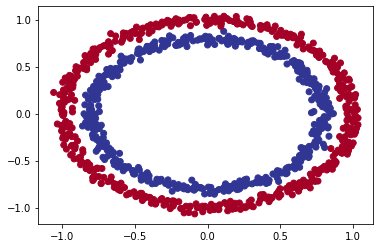

In [6]:
#Visualize with a plot
plot_data(x)

We're trying to predict whether a point on the circle is red or blue

##Input and Output Shapes

In [7]:
#Check the shape of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
#Check the number of examples
len(x), len(y)

(1000, 1000)

In [9]:
#View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

So we're taking the two points and trying to predict 0 or 1

##Steps in Modelling

- Get the data ready (turn it into tensors)
- Build or pick a pretrained model (to suit your problem)
- Fit the model to the data and make a prediction
- Evaluate the model
- Improve through experimentation
- Save and reload your trained model

In [10]:
#Import Tensorflow
import tensorflow as tf

In [11]:
#Set random seed
tf.random.set_seed(42)
#Build a Model

# 1. Create a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                               
])

# 2. Compile the Model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
# 3. Fit the Model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
#Trying to improve our model by training for longer
tf.random.set_seed(42)

# 1. Create a Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                           
])
# 2. Compile the Model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
# 3. Fit the Model
model_2.fit(x, y, epochs= 200, verbose=0)

In [13]:
#Evaluate the model
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [14]:
#Trying to improve our model by adding another layer

tf.random.set_seed(42)

# 1. Create a Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)                           
])
# 2. Compile the Model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)
# 3. Fit the Model
model_3.fit(x, y, epochs = 200, verbose = 0)

# 4. Evaluate the Model
model_3.evaluate(x, y) #Not ideal to train and test on the same data. This is just for practice

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999393463135, 0.5]

##Improve our Model

Within each step of building our model we can improve our model in following ways:

1. Create a Model
    - Add More Layers
    - Increase the number of Hidden Layers
    - Add activation function to the layers
2. Compile the Model
    - Change the optimizer
    - Change the Learning Rate
3. Fit the Model
    - Fit on more data
    - Increase the value of epochs (train for longer)


Since these are hyperparametes, we can change them. And they are the one who affects the parameters (weights and biases) which ultimately affects the performance of our model.


In [15]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create a Model (Change from previous - add 3 hidden layers)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                           
])
# 2. Compile the Model (Change from previous - use Adam optimizer)
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# 3. Fit the Model
model_4.fit(x, y, epochs = 100, verbose = 0)

In [16]:

# 4. Evaluate the Model
model_4.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189085006714, 0.5090000033378601]

Its a good idea to visualize:

- Data
- Model
- Training
- Predictions

To visualize our model's predictions, let's create a function called `plot_decision_boundary()`, this function will:

- Take in a trained model, features (x), labels (y)
- Create a meshgrid of the different x values 
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones (where each unique class falls)


In [17]:
#Import Numpy
import numpy as np

In [18]:

def plot_decision_boundary(model, x, y):
  """
  Plots decision boundary created by a model predicting on x.
  """
  #Define the axis boundary of the plot and create a mesh group
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1 #to give it a margin add and sub 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #return 100 evenly spaced number betwen min and max 
                       np.linspace(y_min,y_max, 100))

  #Create x values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)
 
  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass Classification")
    #We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  


Binary Classification


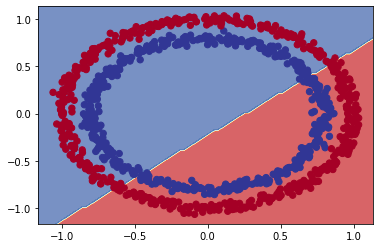

In [19]:
#Check the predictions
plot_decision_boundary(model = model_4,
                       x = x,
                       y = y)

From above we can see that our model is performing very poorly. We have a linear decision boundary and non-linear data

In [20]:
#Can out model be used for a regression problem.

tf.random.set_seed(42)

#Create some regression data
x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = x + 100
len(x_reg)

200

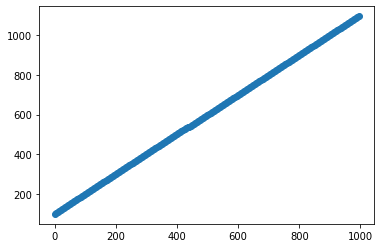

In [21]:
plt.scatter(x_reg, y_reg)

In [22]:
#Splitting into train and test
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]
len(x_reg_train), len(x_reg_test), len(y_reg_train), len(y_reg_test)
# x_reg_train, x_reg_test, y_reg_train, y_reg_test

(150, 50, 150, 50)

In [23]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create a Model (Change from previous - add 3 hidden layers)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                           
])
# 2. Compile the Model (Change from previous - use Adam optimizer)
model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)
# 3. Fit the Model
model_5.fit(x_reg_train, y_reg_train, epochs=100, verbose=0)


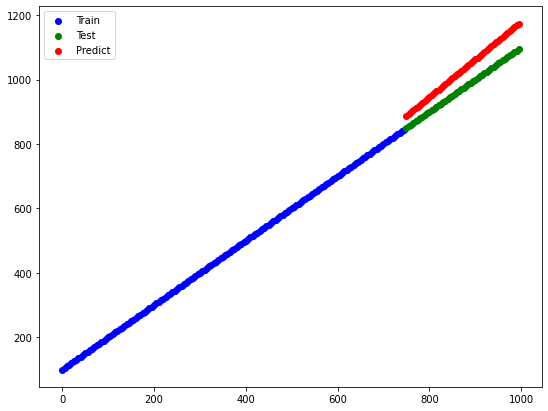

In [24]:
#Make predictions with our trained model
y_reg_pred = model_5.predict(x_reg_test)

#Plot model's predictions against our regression data
plt.figure(figsize=(9,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Train')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test')
plt.scatter(x_reg_test, y_reg_pred, c='r', label='Predict')
plt.legend();

Our model is working relatively fine for a regression problem. Our model isn't working for our classification problems because our data isn't linear and we have to introduce non-linearity in our model to increase accuracy.

##Non-Linearity


Lets test various models by adding little little changes and seeing what works and what doesn't

In [25]:
#Experiment 1
#Set the random seed
tf.random.set_seed(42)
 
#Build the model

# 1. Create a Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
    # tf.keras.layers.Dense(),
    # tf.keras.layers.Dense()                               
])
# 2. Compile the Model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)
# 3. Fit the Model
history = model_6.fit(x, y, epochs=100, verbose=0)

# #4. Evaluate the Model
model_6.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.4710


[0.8103951811790466, 0.47099998593330383]

`history.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [26]:
#Function to plot history 
def plot_history(history = history):
  pd.DataFrame(history.history).plot()
  plt.xlabel('Epochs')
  plt.legend();

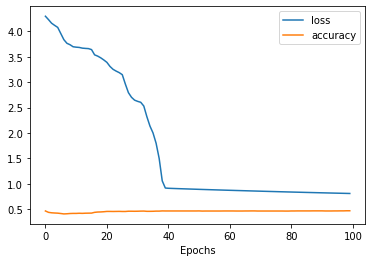

In [27]:
#Plot history
plot_history()

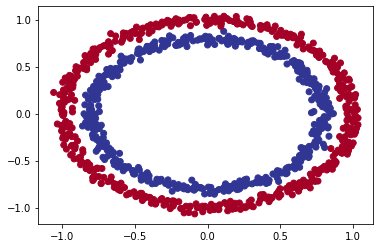

In [28]:
#Plot data
plot_data(x)

Binary Classification


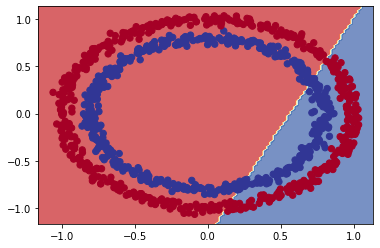

In [29]:
#Plot decision boundary
plot_decision_boundary(model=model_6,
                       x=x,
                       y=y)

In [30]:
#Experiment 2 - Add Non-Linearity

#Set random seed
tf.random.set_seed(42)

# 1. Create a Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='ReLU')
])
# 2. Compile the Model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)
# 3. Fit the Model
history = model_7.fit(x, y, epochs=100, verbose = 0)

# 4. Evaluate the Mode
model_7.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.4710


[0.8103951811790466, 0.47099998593330383]

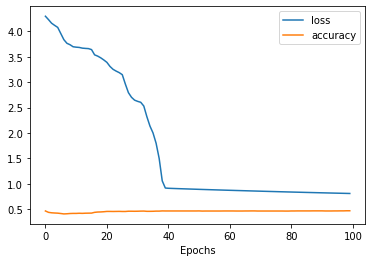

In [31]:
#Plot history
plot_history(history)

Binary Classification


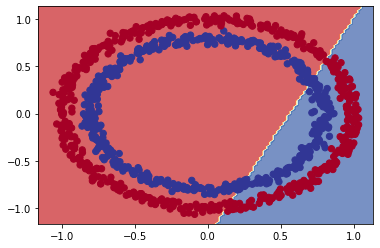

In [32]:
#Plot decision boundary
plot_decision_boundary(model=model_7,
                       x=x,
                       y=y)

In [33]:
#Experiment 3 - Increase number of neurons and layers

#Set random seed
tf.random.set_seed(42)

# 1. Create a Model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='ReLU'),
    tf.keras.layers.Dense(4, activation='ReLU'),
    tf.keras.layers.Dense(1)
])
# 2. Compile the Model
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)
# 3. Fit the Model
history = model_8.fit(x, y, epochs=300, verbose = 0)

# 4. Evaluate the Mode
model_8.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

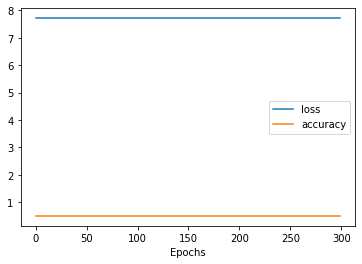

In [34]:
#Plot history
plot_history(history)

Binary Classification


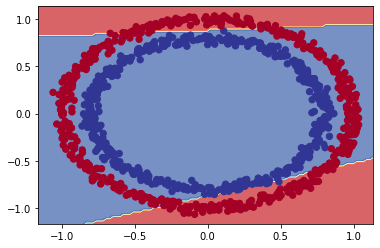

In [35]:
#Plot decision boundary
plot_decision_boundary(model=model_8,
                       x=x,
                       y=y)

In [36]:
#Experiment 4 - add ReLU activation to the final layer

#Set random seed
tf.random.set_seed(42)

# 1. Create a Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='ReLU'),
    tf.keras.layers.Dense(4, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='ReLU')                             
])
# 2. Compile the Model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)
# 3. Fit the Model
history = model_9.fit(x, y, epochs=100, verbose = 0)

# 4. Evaluate the Mode
model_9.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000


[0.014017811976373196, 1.0]

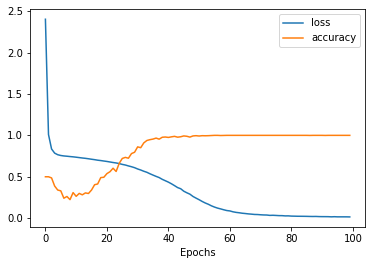

In [37]:
#Plot history
plot_history(history)

Binary Classification


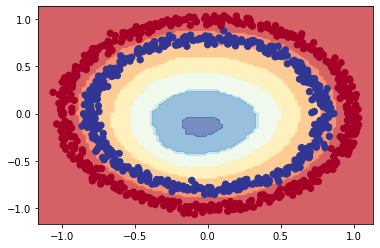

In [38]:
#Plot decision boundary
plot_decision_boundary(model=model_9,
                       x=x,
                       y=y)

In [39]:
#Experiment 5 - add sigmoid activation to the last layer

#Set random seed
tf.random.set_seed(42)

# 1. Create a Model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='ReLU'),
    tf.keras.layers.Dense(4, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')                             
])
# 2. Compile the Model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)
# 3. Fit the Model
history = model_10.fit(x, y, epochs=100, verbose = 0)

# 4. Evaluate the Mode
model_10.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000


[0.011743497103452682, 1.0]

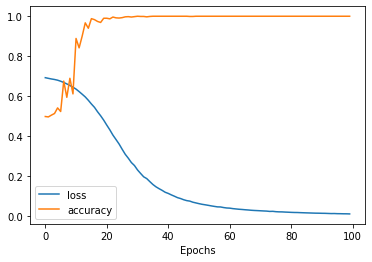

In [40]:
#Plot history
plot_history(history)

Binary Classification


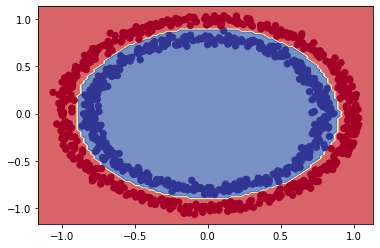

In [41]:
#Plot decision boundary
plot_decision_boundary(model=model_10,
                       x=x,
                       y=y)

The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.

##Activation Functions from Scratch

In [42]:
#Create dummy data

dt = tf.cast(tf.range(-10, 10), tf.float32)
dt

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

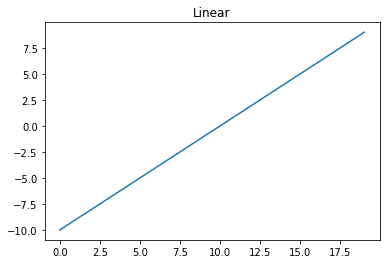

In [43]:
plt.plot(dt) #Linear
plt.title("Linear");

In [44]:
#Replicate sigmoid activation function - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use this function on the dummy data
sigmoid(dt)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

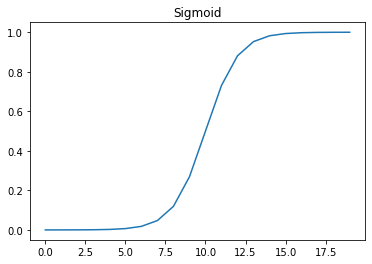

In [45]:
#Plot sigmoid(dt)
plt.plot(sigmoid(dt))
plt.title("Sigmoid");

In [46]:
#Replicate ReLU activation function - relu(x) = max(x, 0)
def relu(x):
  return tf.maximum(x, 0)

#Use it on the dummy data
relu(dt)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

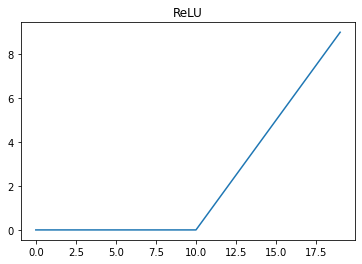

In [47]:
#Plot relu
plt.plot(relu(dt))
plt.title("ReLU");

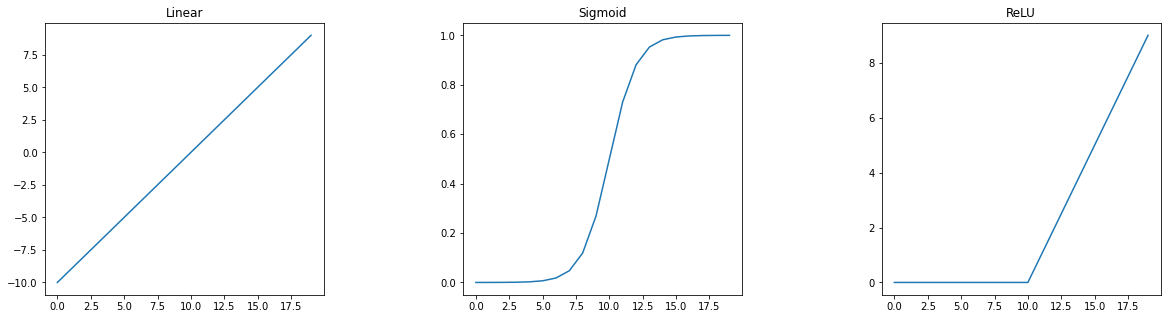

In [48]:
fig = plt.figure(figsize=(20, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(dt)
plt.title("Linear")
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(sigmoid(dt))
plt.title("Sigmoid")
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(relu(dt))
plt.title("ReLU");


##Evaluating and Improving our Classification Model

So far we've been training and evaluating our model on the same dataset but it's not the right way. We should train our model on the training dataset and test it on the test dataset for **Generalization**.
Typically there are three datasets that we use:
- Training Set
- Evaluating Set
- Testing Set

Generalization : It is the ability for a machine learning model to perform well on data it hasn't seen before.

In [49]:
#Check the number of examples
len(x)

1000

In [50]:
#Splitting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
#Check the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [52]:
#Recreate the model to fit on the training data and evaluate on the test data
#Set random seed
tf.random.set_seed(42)

#Build the model

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="ReLU"),
    tf.keras.layers.Dense(4, activation="ReLU"),
    tf.keras.layers.Dense(1, activation="sigmoid")                                
])
# 2. Compile the model
model_11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)
# 3. Fit the model
history = model_11.fit(x_train, y_train, epochs = 80, verbose = 0)

# 4. Evaluate the model
model_11.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000


[0.006614977493882179, 1.0]

For many problems, the loss function going down means the model is improving (the predictions it is making are getting closer to the actual value labels).

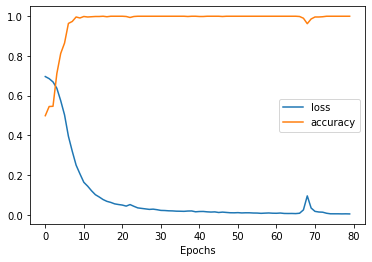

In [53]:
 #Plot history
plot_history(history)

Binary Classification
Binary Classification


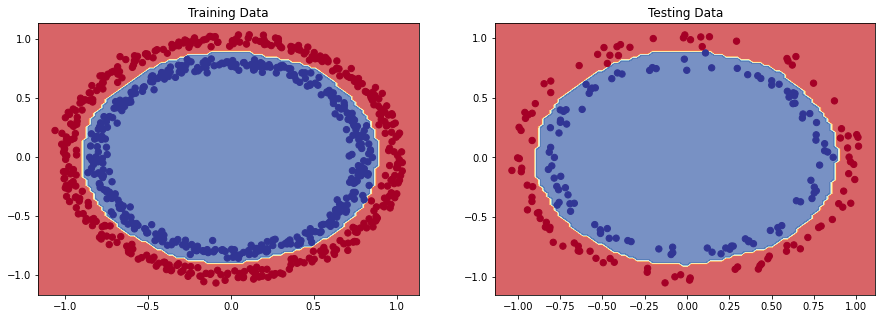

In [54]:
#Plot decision boundary for training and testing dataset
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
plot_decision_boundary(model_11, x_train, y_train)
plt.title("Training Data")
ax2 = fig.add_subplot(1, 2, 2)
plot_decision_boundary(model_11, x_test, y_test)
plt.title("Testing Data");

##Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

- A learning rate **callback** - a callback is an extra piece of functionality, you can add to your model while it is training.
- A model
- A modified loss curve plot.

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build a Model

# 1. Create a Model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                                    
])
# 2. Compile the Model
model_12.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the Model
history = model_12.fit(x_train, y_train, epochs = 100, callbacks=[lr_scheduler])

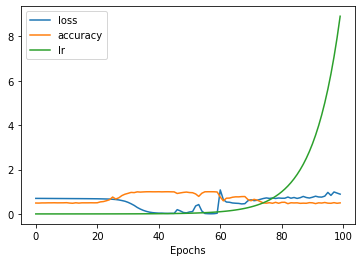

In [56]:
#Plot history
plot_history(history)

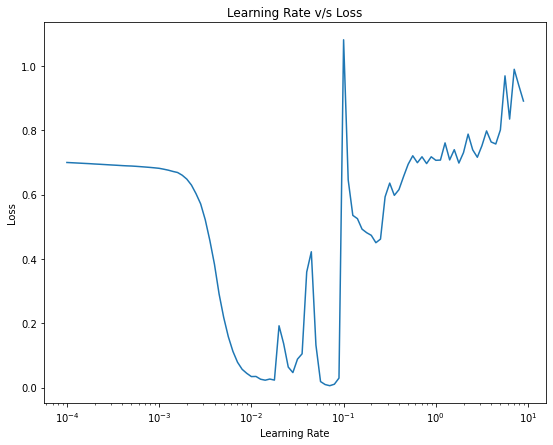

In [57]:
#Plot learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(9,7))
plt.semilogx(lrs, history.history['loss']);
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title("Learning Rate v/s Loss");

From the above graph we can see that 0.01 was the approximate ideal learning rate

##Classification Evaluation Methods

Key:
- tp - True Positive
- tn - True Negative
- fp - False Positive
- fn - False Negative

these methods evaluate our models predictions with the true values.

| Metric Name | Metric Formula | Code | When to Use |
| --- | --- | --- |  --- |
|Accuracy|`(tp + tn)/(tp + tn + fp + fn)`|`tf.keras.metrics.Accuracy()`<br> `sklearn.metrics.accuracy_score()`|Default metric for classification problems.<br> Not the best for imbalanced classes.|
|Precision|`(tp)/(tp + fp)`|`tf.keras.metrics.Precision()`<br> `sklearn.metrics.precision_score()`|Higher precision leads to less false positives.|
|Recall|`(tp)/(tp+fn)`|`tf.keras.metrics.Recall()`<br> `sklearn.metrics.recall_score()`|Higher recall leads to less false negatives.|
|F1-score|`2 * (precision * recall)/(precision + recall)`|`sklearn.metrics.f1_score()`|Combination of precision and recall. <br> Usually a good overall metric for a classification model.|
|Confusion Matrix|NA|`Custom function`<br> `sklearn.metrics.confusion_matrix()` |When comparing predictions to truth labels to see where model gets confused.<br> Can be hard to use with large number of classes.|
|Classification Report|NA|`sklearn.metrics.classification_report()`|Builds a tesxt report showing the main classification metrics.|

Unfortunately, you cannot have both precision and high recall. If you increase precision, it will reduce recall, and vice versa. This is called **precision/recall tradeoff**.


In [58]:
#Accuracy
loss, accuracy = model_11.evaluate(x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy*100}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Loss: 0.006614977493882179
Accuracy: 100.0%


###Confusion Matrix

|||
| --- | --- |
|`True Negative`<br> `True Label - 0` <br> `Predicted Label - 0` | `False Positive`<br>`True Label - 0` <br> `Predicted Label - 1`|
|`False Negative`<br> `True Label - 1` <br> `Predicted Label - 0` | `True Positive`<br>`True Label - 1` <br> `Predicted Label - 1`|


Since the prediction come in the form of prediction probability form, we'll have to convery them to binary by rounding them off.

In [59]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_pred = model_11.predict(x_test)

#Create confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[100,   0],
       [  0, 100]])

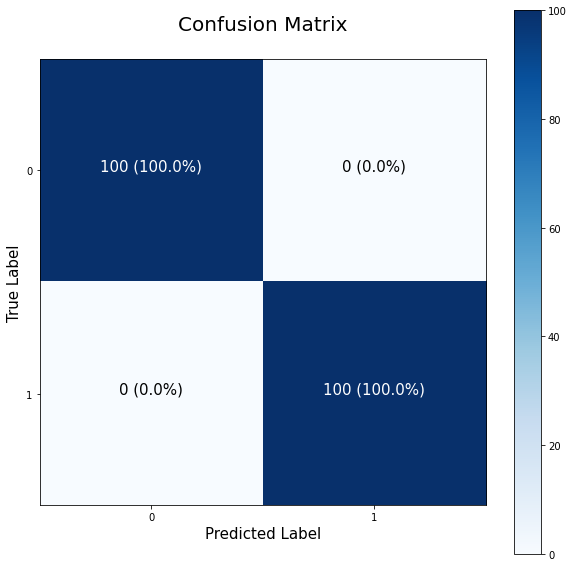

In [71]:
#Visualize the confusion matrix
import itertools

figsize = (10, 10)

#Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalize the confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
#Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])  

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

#Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2. 

#Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                       horizontalalignment="center",
                       color="white" if cm[i,j] > threshold else "black",
                       size=15)
